#### Instruction

### Problem Statement:
One of the hospitals has a patient dataset that contains a wide range of heart-related features. This data allows hospital staff to conduct detailed analyses of heart-related conditions and treatments. We must build a logistic regression model to predict whether a patient has heart disease or not. Calculate the feature importance as well. The dataset contains data for around 303 patients.
 
### Data Description:

age: Age of the patient in years.

gender: Gender of the patient.

cp: Chest pain type.

trestbps: Resting blood pressure (in mm Hg on admission to the hospital).

chol: Serum cholesterol in mg/dl.

fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

restecg: Resting electrocardiographic results.

thalach: Maximum heart rate achieved.

exang: Exercise induced angina (1 = yes; 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slope: The slope of the peak exercise ST segment.

ca: Number of major vessels (0-3) colored by fluoroscopy.

thal: 3 = normal; 6 = fixed defect; 7 = reversible defect.

heart_diagnosis: Diagnosis of heart disease (angiographic disease status) (0 = No heart disease, >0 = heart disease).


### Tasks/Activities List:
Your code should contain the following activities/Analysis:

Read the heart dataset.

Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.

Transform the categorical data.

Apply the Logistic Regression model.

Print the model results.

Get the feature importance.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings 
warnings.filterwarnings('ignore')

### Read the heart dataset

In [2]:
df = pd.read_csv(r"/Users/mymac/Documents/Data Science Bootcamp/Week 16 - Regularization - Ridge and Lasso Regression/Heart Disease Prediction with Logistic Regression-Analysis of Heart Disease Dataset - Assignment/heart_disease.csv")

### Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any

In [3]:
# Get the top 5 rows of the dataframe
df_head = df.head()
df_head

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Get the shape of the DataFrame (number of rows and columns)
df_shape = df.shape
print("Data shape:", df_shape)

Data shape: (303, 14)


In [5]:
# Display information about the DataFrame, including data types and non-null values count
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [6]:
# Drop the rows with missing values
df.dropna(inplace=True)

In [7]:
# Check null values count
df_null_count = df.isnull().sum()
df_null_count

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64

In [8]:
# Get summary statistics of the DataFrame (e.g., mean, min, max)
#For numerical columns
df_summary_numeric=df.describe()
df_summary_numeric

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


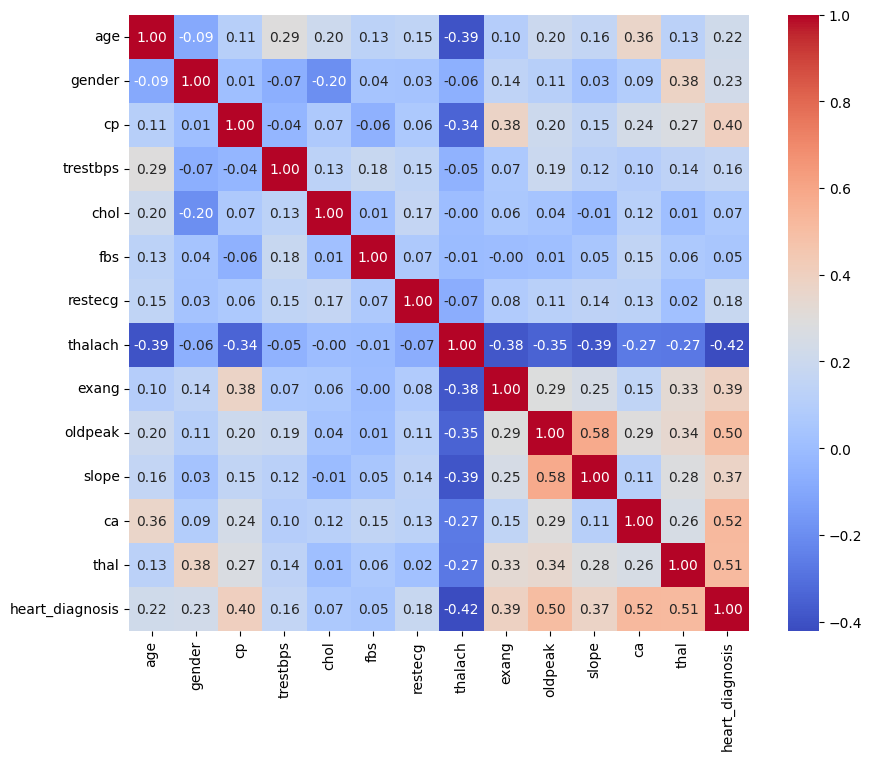

In [9]:
# Check for correlations - If there are highly correlated input features we will drop one of them to 
# avoid multi-collinearity. We are setting numeric_only=True to run correlation on only numeric variables
plt.figure(figsize=(10, 8))
corr = df.corr()
correlation_heatmap=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
             cmap='coolwarm', fmt=".2f")
plt.show()

In [10]:
# Check distribution of heart_diagnosis variable
heart_diagnosis_distribution = df['heart_diagnosis'].value_counts()
print("Target variable distribution:\n", heart_diagnosis_distribution)

Target variable distribution:
 0    160
1     54
2     35
3     35
4     13
Name: heart_diagnosis, dtype: int64


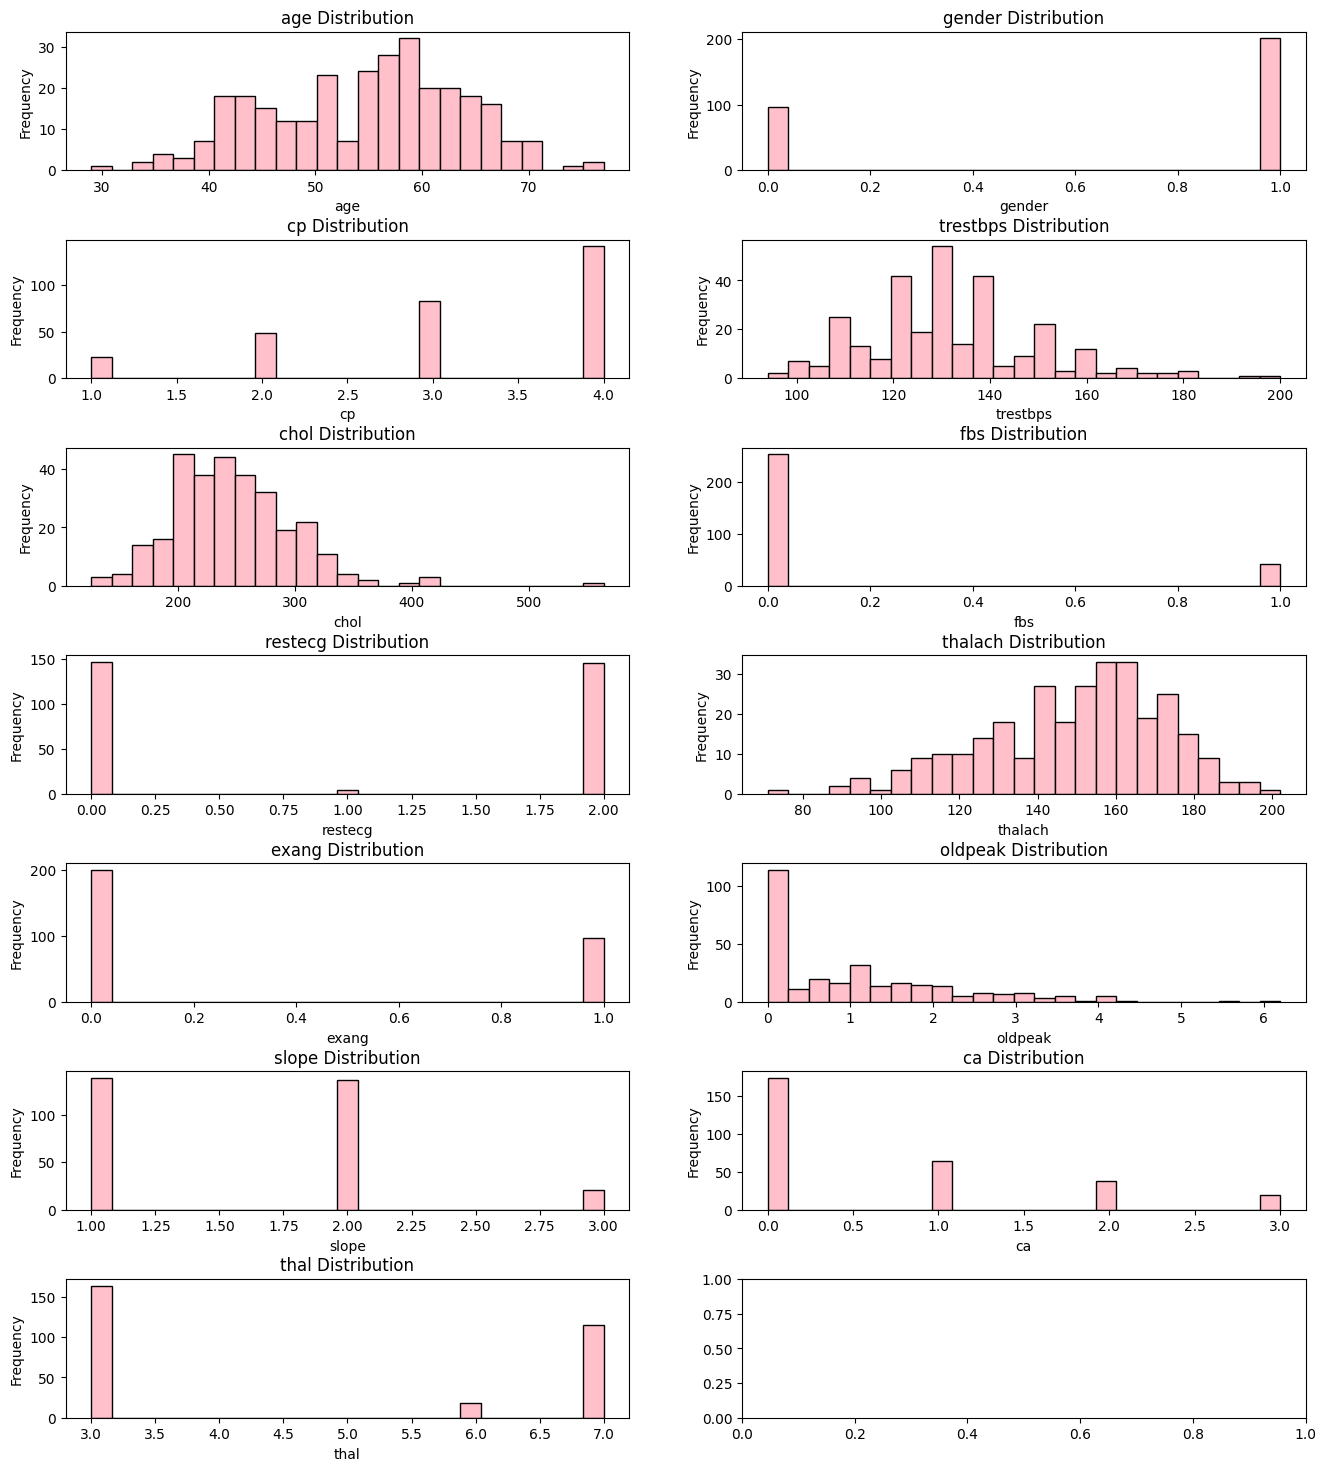

In [11]:
# Histograms of all numerical columns
# Define the number of columns and rows for subplots
num_cols = df.shape[1]              # Number of columns in the DataFrame
num_rows = (num_cols - 1) // 2 + 1  # Calculate the number of rows needed for subplots

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 18))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(df.columns):
    if column == 'heart_diagnosis':
        continue                      # Skip the target variable if it's in the DataFrame
    ax = axes[i]
    ax.hist(df[column], bins=25, color='pink', edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)              # set the label for x-axis
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Show the subplots
plt.show()

## Transform the categorical data

heart_diagnosis:

(0 = No heart disease, >0 = heart disease)

In [12]:
df['heart_diagnosis'] = df['heart_diagnosis'].apply(lambda x: 0 if x==0 else 1 )

In [13]:
heart_diagnosis_distribution_pp = df['heart_diagnosis'].value_counts()
print("Target variable distribution after preprocessing:\n", heart_diagnosis_distribution_pp)

Target variable distribution after preprocessing:
 0    160
1    137
Name: heart_diagnosis, dtype: int64


#### Transform the categorical features which have more than two classes
The binary categorical columns in the current data are already good to use as it is, since they already only have 0 and 1 . 

Define the subset of columns to one-hot encode
Perform one-hot encoding on the selected columns using get dummies method of pandas and concatenate with the original DataFrame
Drop the original columns that were one-hot encoded using drop method

In [14]:
columns_to_encode = ['cp', 'restecg', 'ca', 'thal']
df[columns_to_encode] = df[columns_to_encode].astype(str)

## extra
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
##

df = pd.concat([df, pd.get_dummies(df[columns_to_encode])], axis=1)
df.drop(columns=columns_to_encode, inplace=True)

In [15]:
numeric_columns.remove('heart_diagnosis')
numeric_columns

['age',
 'gender',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'slope']

In [16]:
df.columns

Index(['age', 'gender', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'slope', 'heart_diagnosis', 'cp_1.0', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'ca_0.0',
       'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [17]:
df.head()

,age,gender,trestbps,chol,fbs,thalach,exang,oldpeak,slope,heart_diagnosis,...,restecg_0.0,restecg_1.0,restecg_2.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,3.0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0,1,...,0,0,1,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,0,0,1,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,3.0,0,...,1,0,0,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,1.0,0,...,0,0,1,1,0,0,0,1,0,0


## Apply the Logistic Regression model

In [18]:
# Separate input and target features
X = df.drop('heart_diagnosis', axis=1)
y = df['heart_diagnosis']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (297, 23)
y shape: (297,)


In [19]:
# Scaling numeric features
# Displaying the columns in the training data
X.columns 

Index(['age', 'gender', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'slope', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'ca_0.0', 'ca_1.0',
       'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [20]:
scaler = StandardScaler()
X[numeric_columns] = (
    scaler.fit_transform(X[numeric_columns]))

In [21]:
# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Build the Model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [23]:
# Predict on the test data
y_pred = model.predict(X_test)

In [24]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


## Print the model results

In [25]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        49
           1       0.89      0.83      0.86        41

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90



In [26]:
model_coefs = model.coef_
model_intercept = model.intercept_
print('Coefficients:', model_coefs)
print('Intercept:',model_intercept)

Coefficients: [[-0.12052695  0.61878905  0.39777214  0.23170347 -0.18809754 -0.47844819
   0.31502201  0.41910509  0.3821056  -0.6595625   0.12127767 -0.56629231
   1.10466654 -0.26785513  0.09753143  0.17041311 -1.54536183  0.32332926
   0.92734147  0.29478051 -0.50569808 -0.33910032  0.84488781]]
Intercept: [0.26689579]


## Get the feature importance

In [27]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_[0])})
importances = importances.sort_values('Importance', ascending=False)
print('Feature Importances:\n', importances)

Feature Importances:
         Feature  Importance
16       ca_0.0    1.545362
12       cp_4.0    1.104667
18       ca_2.0    0.927341
22     thal_7.0    0.844888
9        cp_1.0    0.659562
1        gender    0.618789
11       cp_3.0    0.566292
20     thal_3.0    0.505698
5       thalach    0.478448
7       oldpeak    0.419105
2      trestbps    0.397772
8         slope    0.382106
21     thal_6.0    0.339100
17       ca_1.0    0.323329
6         exang    0.315022
19       ca_3.0    0.294781
13  restecg_0.0    0.267855
3          chol    0.231703
4           fbs    0.188098
15  restecg_2.0    0.170413
10       cp_2.0    0.121278
0           age    0.120527
14  restecg_1.0    0.097531
